## Finite difference modelling

In [35]:
import numpy as np 
from scipy.sparse import spdiags
from scipy.linalg import solve
import matplotlib.pyplot as plt

In [22]:
x = np.arange(21.)
print(len(x), x)
a = np.ones(len(x)-1)
a[10:] = 2
print(len(a), a)

21 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
20 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [29]:
def createMatrix(x, a=None):
    if a is None:
        a = np.ones(len(x)-1)

    dx = np.diff(x)
    dadx = a / dx
    dx2 = (x[2:]-x[:-2]) / 2
    # dx2 = (dx[:-1] + dx[1:]) / 2
    Aleft = dadx[:-1] / dx2
    Aright = dadx[1:] / dx2
    Aself = -Aleft-Aright
    A = spdiags(np.vstack([Aleft, Aself, Aright]), [1, 0, -1])
    return A

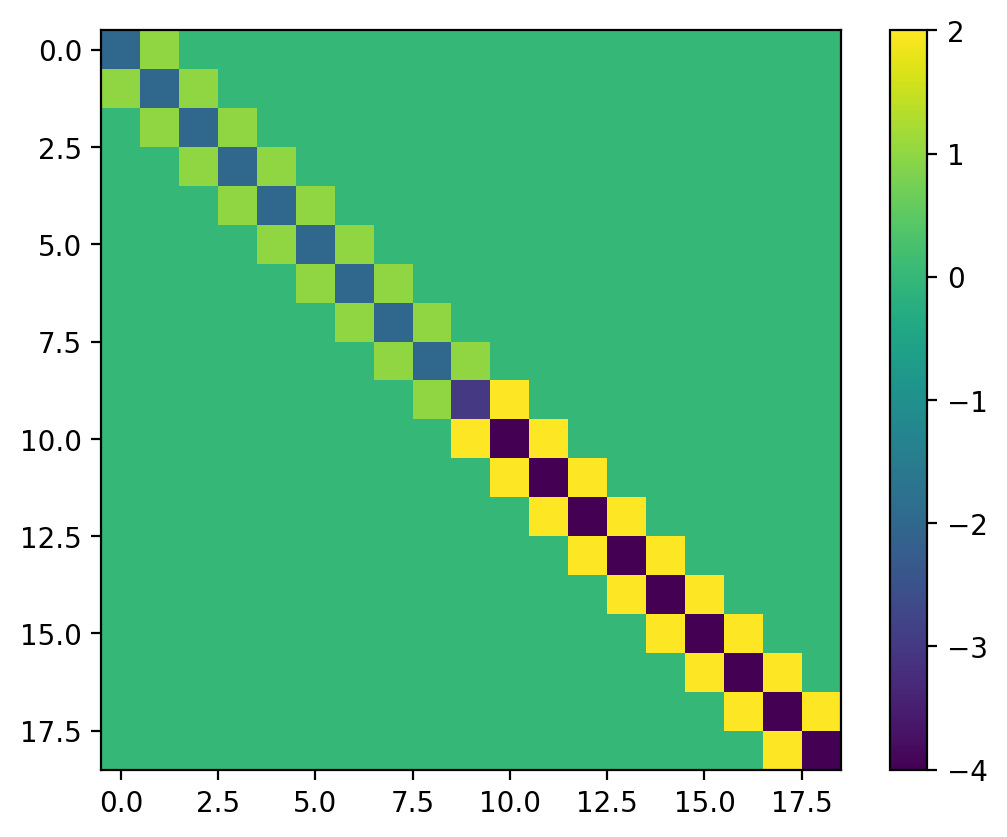

In [30]:
A = createMatrix(x, a)
plt.imshow(A.todense())
plt.colorbar();

In [36]:
f = np.zeros(len(x))
# f[len(x)//2] = -2
u = solve(A, f)
plt.plot(x, u);

ValueError: Sparse matrices are not supported by this function. Perhaps one of the scipy.sparse.linalg functions would work instead.

In [12]:
u.shape

(11, 11)